In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Datasets

In [3]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Visualizing Dataset

<Axes: xlabel='quality', ylabel='fixed acidity'>

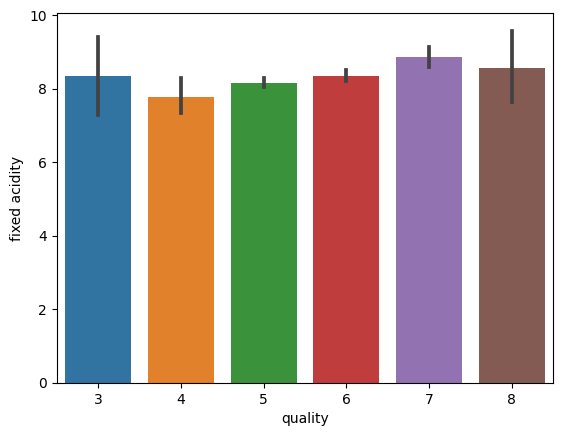

In [5]:
import seaborn as sns

sns.barplot(data=df, x = 'quality', y='fixed acidity')

<Axes: xlabel='quality', ylabel='volatile acidity'>

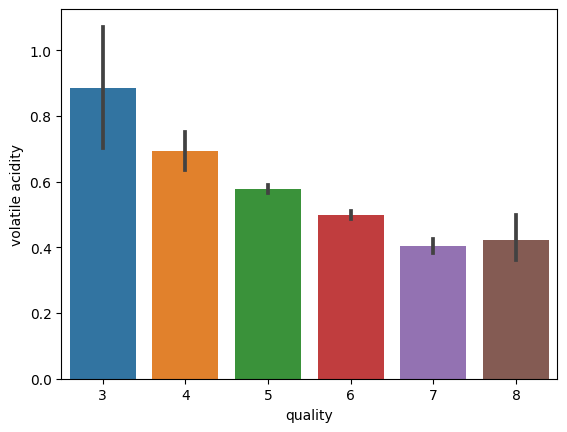

In [6]:
sns.barplot(data=df, x='quality', y='volatile acidity')

<Axes: xlabel='quality', ylabel='citric acid'>

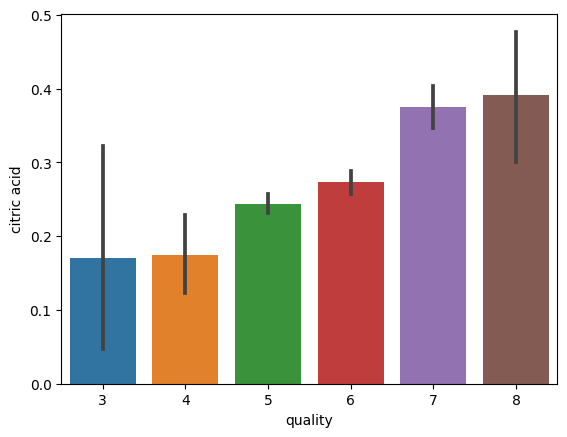

In [7]:
sns.barplot(data=df, x='quality', y='citric acid')

<Axes: xlabel='quality', ylabel='residual sugar'>

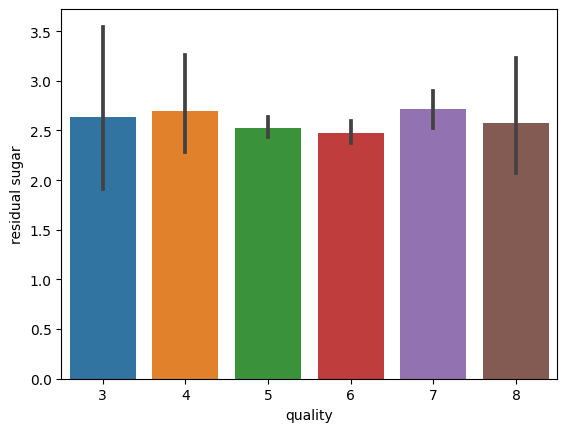

In [8]:
sns.barplot(data=df, x='quality', y='residual sugar')

<Axes: xlabel='quality', ylabel='chlorides'>

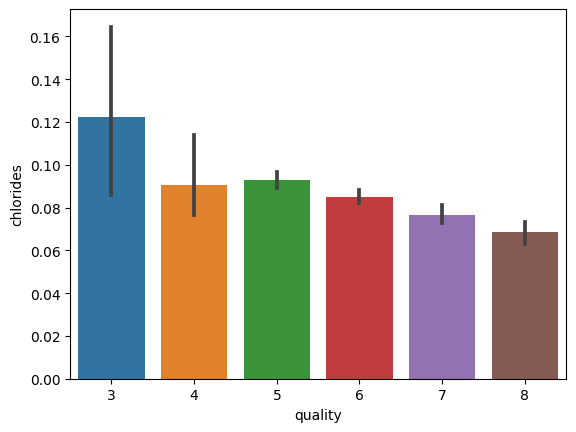

In [9]:
sns.barplot(data=df, x='quality', y='chlorides')

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

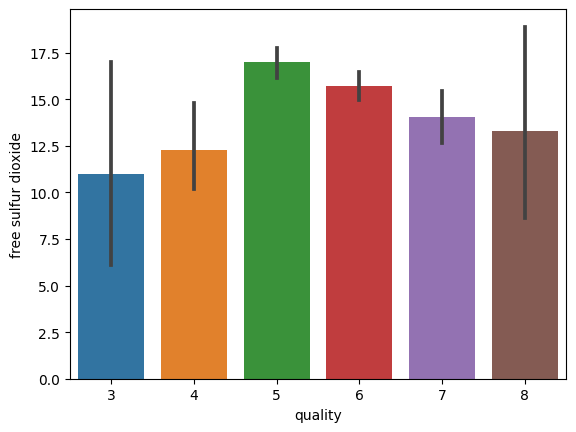

In [10]:
sns.barplot(data=df, x='quality', y='free sulfur dioxide')

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

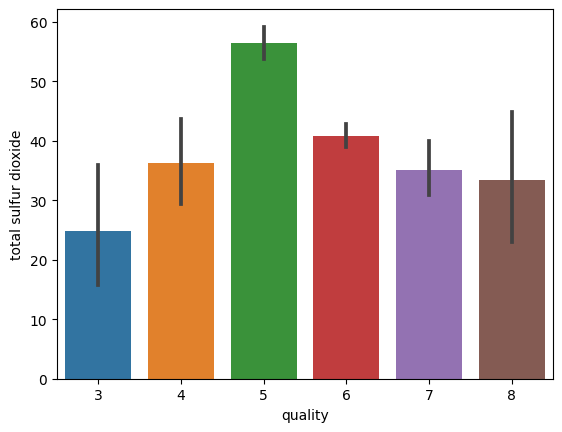

In [11]:
sns.barplot(data=df, x='quality', y='total sulfur dioxide')

<Axes: xlabel='quality', ylabel='sulphates'>

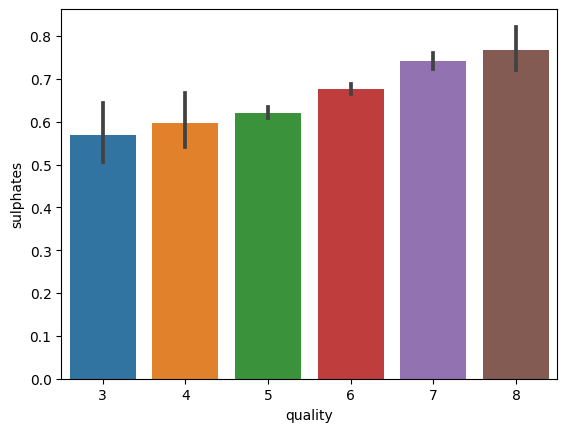

In [12]:
sns.barplot(data=df, x='quality', y='sulphates')

<Axes: xlabel='quality', ylabel='alcohol'>

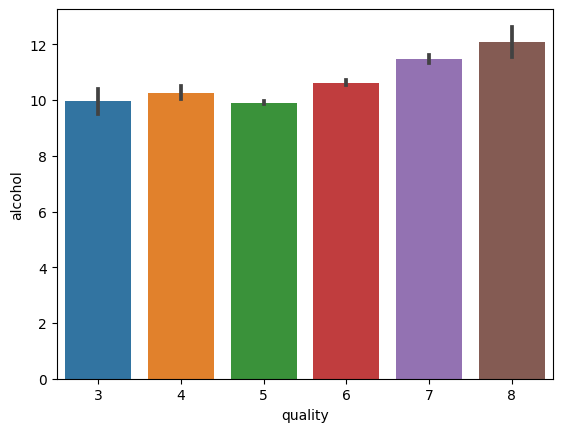

In [13]:
sns.barplot(data=df, x='quality', y='alcohol')

## Preprocessing

In [14]:
bins = (2, 6.5, 8) # 2-6.5, 6.5-8,
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins=bins, labels=group_names)

In [15]:
from sklearn.preprocessing import LabelEncoder

label_quality = LabelEncoder()

In [16]:
df['quality'] = label_quality.fit_transform(df['quality'])

In [17]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

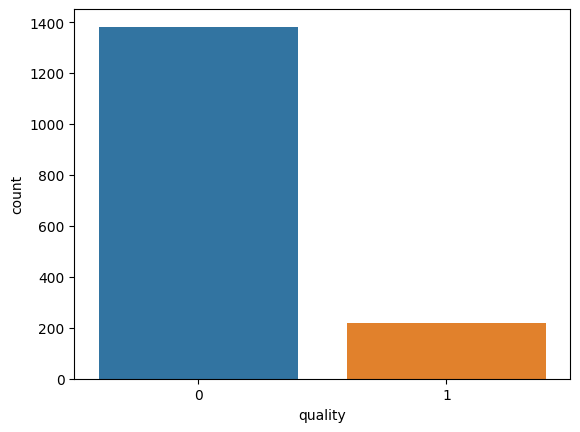

In [27]:
sns.countplot(data=df, x='quality')

## Train, Test

In [28]:
X = df.drop('quality', axis=1)
y = df['quality']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [31]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Log Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [33]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



## KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model = knn_model.fit(X_train, y_train)

In [35]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.61      0.40      0.49        47

    accuracy                           0.88       320
   macro avg       0.76      0.68      0.71       320
weighted avg       0.86      0.88      0.86       320



## SVM

In [36]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [37]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

